# Web Scraping del API  de Rick and Morty


## Introducción
El web scraping es una técnica utilizada para extraer información de páginas web de manera automatizada. En este caso, utilizaremos la API de "Rick and Morty" para obtener datos relacionados con la serie. La API proporciona acceso a información sobre personajes, episodios, ubicaciones, entre otros.

### En esta API se tienen tres principales categorias:
1. Character: Son los personajes de la serie
2. location: Son las localidades o lugares que existen en la serie
3. episode: Son los capitulos de la serie

#### 1. información de los personajes obtenida de la API.
realizamos una solicitud a la API de "Rick and Morty" para obtener información sobre los personajes y la almacena en un DataFrame de pandas, lo cual permite realizar manipulaciones y análisis posteriores de los datos.


In [5]:
import requests
import pandas as pd

character = requests.get("https://rickandmortyapi.com/api/character")
data = character.json()
df_character = pd.DataFrame(data["results"])

df_character

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z
5,6,Abadango Cluster Princess,Alive,Alien,,Female,"{'name': 'Abadango', 'url': 'https://rickandmo...","{'name': 'Abadango', 'url': 'https://rickandmo...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/27],https://rickandmortyapi.com/api/character/6,2017-11-04T19:50:28.250Z
6,7,Abradolf Lincler,unknown,Human,Genetic experiment,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Testicle Monster Dimension', 'url': ...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/10, h...",https://rickandmortyapi.com/api/character/7,2017-11-04T19:59:20.523Z
7,8,Adjudicator Rick,Dead,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/28],https://rickandmortyapi.com/api/character/8,2017-11-04T20:03:34.737Z
8,9,Agency Director,Dead,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/24],https://rickandmortyapi.com/api/character/9,2017-11-04T20:06:54.976Z
9,10,Alan Rails,Dead,Human,Superhuman (Ghost trains summoner),Male,"{'name': 'unknown', 'url': ''}","{'name': 'Worldender's lair', 'url': 'https://...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/25],https://rickandmortyapi.com/api/character/10,2017-11-04T20:19:09.017Z


###### Utilizamos la API de Rick and Morty para obtener todos los personajes de la serie. Además, utilizamos el API para recolectar todos los personajes pagina por pagina.

In [6]:
import requests

def obtener_todos_los_personajes():
    # URL base de la API
    url_base = "https://rickandmortyapi.com/api/character"
    
    # Lista para almacenar todos los personajes
    personajes = []
    
    # Parámetro de página inicial
    pagina = 1
    
    # Iterar hasta obtener todos los personajes
    while True:
        # Construir la URL de la página actual
        url_pagina = f"{url_base}?page={pagina}"
        
        # Realizar la solicitud a la API
        response = requests.get(url_pagina)
        data = response.json()
        
        # Obtener los personajes de la página actual
        personajes_pagina = data["results"]
        
        # Agregar los personajes a la lista
        personajes.extend(personajes_pagina)
        
        # Verificar si hay más páginas
        if data["info"]["next"] is not None:
            pagina += 1
        else:
            break
    
    return personajes

# Llamar a la función para obtener todos los personajes
personajes = obtener_todos_los_personajes()

# Imprimir la cantidad de personajes obtenidos
print(f"Se obtuvieron {len(personajes)} personajes.")

# Ejemplo de impresión de nombres de personajes
for personaje in personajes:
    print(personaje["name"])


Se obtuvieron 826 personajes.
Rick Sanchez
Morty Smith
Summer Smith
Beth Smith
Jerry Smith
Abadango Cluster Princess
Abradolf Lincler
Adjudicator Rick
Agency Director
Alan Rails
Albert Einstein
Alexander
Alien Googah
Alien Morty
Alien Rick
Amish Cyborg
Annie
Antenna Morty
Antenna Rick
Ants in my Eyes Johnson
Aqua Morty
Aqua Rick
Arcade Alien
Armagheadon
Armothy
Arthricia
Artist Morty
Attila Starwar
Baby Legs
Baby Poopybutthole
Baby Wizard
Bearded Lady
Beebo
Benjamin
Bepisian
Beta-Seven
Beth Sanchez
Beth Smith
Beth Smith
Beth's Mytholog
Big Boobed Waitress
Big Head Morty
Big Morty
Body Guard Morty
Bill
Bill
Birdperson
Black Rick
Blamph
Blim Blam
Blue Diplomat
Blue Footprint Guy
Blue Shirt Morty
Bobby Moynihan
Boobloosian
Bootleg Portal Chemist Rick
Borpocian
Brad
Brad Anderson
Calypso
Campaign Manager Morty
Canklanker Thom
Centaur
Chris
Chris
Coach Feratu (Balik Alistane)
Collector
Colossus
Commander Rick
Concerto
Conroy
Cool Rick
Cop Morty
Cop Rick
Courier Flap
Cousin Nicky
Cowboy Mort

trasladamos todos los datos a un csv


In [7]:
import csv

def guardar_personajes_como_csv(personajes):
    # Verificar si se obtuvieron personajes
    if len(personajes) == 0:
        print("No se encontraron personajes.")
        return
    
    # Nombre del archivo CSV
    archivo_csv = "personajes_rick_and_morty.csv"
    
    # Campos del encabezado
    encabezado = ["ID", "Nombre", "Especie", "Género", "Origen", "Ubicación"]
    
    # Abrir el archivo CSV en modo escritura
    with open(archivo_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=encabezado)
        
        # Escribir el encabezado en el archivo
        writer.writeheader()
        
        # Escribir cada personaje en una fila del archivo CSV
        for personaje in personajes:
            fila = {
                "ID": personaje["id"],
                "Nombre": personaje["name"],
                "Especie": personaje["species"],
                "Género": personaje["gender"],
                "Origen": personaje["origin"]["name"],
                "Ubicación": personaje["location"]["name"]
            }
            writer.writerow(fila)
    
    print(f"Se ha guardado la información de los personajes en el archivo {archivo_csv}.")

# Llamar a la función para obtener todos los personajes
personajes = obtener_todos_los_personajes()

# Guardar los personajes en un archivo CSV
guardar_personajes_como_csv(personajes)


Se ha guardado la información de los personajes en el archivo personajes_rick_and_morty.csv.


#### 2. Información sobre las ubicaciones de la serie.
realiza una solicitud de API a la API de Rick and Morty, convierte los datos a formato JSON y luego los convierte en un DataFrame de pandas para su fácil manipulación y análisis.

In [8]:
location = requests.get("https://rickandmortyapi.com/api/location")
data = location.json()
df_location = pd.DataFrame(data["results"])

df_location

,id,name,type,dimension,residents,url,created
0,1,Earth (C-137),Planet,Dimension C-137,"[https://rickandmortyapi.com/api/character/38,...",https://rickandmortyapi.com/api/location/1,2017-11-10T12:42:04.162Z
1,2,Abadango,Cluster,unknown,[https://rickandmortyapi.com/api/character/6],https://rickandmortyapi.com/api/location/2,2017-11-10T13:06:38.182Z
2,3,Citadel of Ricks,Space station,unknown,"[https://rickandmortyapi.com/api/character/8, ...",https://rickandmortyapi.com/api/location/3,2017-11-10T13:08:13.191Z
3,4,Worldender's lair,Planet,unknown,"[https://rickandmortyapi.com/api/character/10,...",https://rickandmortyapi.com/api/location/4,2017-11-10T13:08:20.569Z
4,5,Anatomy Park,Microverse,Dimension C-137,"[https://rickandmortyapi.com/api/character/12,...",https://rickandmortyapi.com/api/location/5,2017-11-10T13:08:46.060Z
5,6,Interdimensional Cable,TV,unknown,"[https://rickandmortyapi.com/api/character/20,...",https://rickandmortyapi.com/api/location/6,2017-11-10T13:09:09.102Z
6,7,Immortality Field Resort,Resort,unknown,"[https://rickandmortyapi.com/api/character/23,...",https://rickandmortyapi.com/api/location/7,2017-11-10T13:09:17.136Z
7,8,Post-Apocalyptic Earth,Planet,Post-Apocalyptic Dimension,"[https://rickandmortyapi.com/api/character/25,...",https://rickandmortyapi.com/api/location/8,2017-11-10T13:09:22.551Z
8,9,Purge Planet,Planet,Replacement Dimension,"[https://rickandmortyapi.com/api/character/26,...",https://rickandmortyapi.com/api/location/9,2017-11-10T13:09:29.566Z
9,10,Venzenulon 7,Planet,unknown,[https://rickandmortyapi.com/api/character/33],https://rickandmortyapi.com/api/location/10,2017-11-18T11:21:51.643Z


utilizamos la API de Rick and Morty para obtener todos los lugares  de la serie. ademas utilizamos el api para recolectar todos los lugares pagina por pagina.

In [9]:
import requests

def obtener_locations():
    # URL base de la API
    url_base = "https://rickandmortyapi.com/api/location"
    
    # Lista para almacenar todos los lugares
    locations = []
    
    # Parámetro de página inicial
    pagina = 1
    
    # Iterar hasta obtener todos los lugares
    while True:
        # Construir la URL de la página actual
        url_pagina = f"{url_base}?page={pagina}"
        
        # Realizar la solicitud a la API
        response = requests.get(url_pagina)
        data = response.json()
        
        # Obtener los lugares de la página actual
        locations_pagina = data["results"]
        
        # Agregar los lugares a la lista
        locations.extend(locations_pagina)
        
        # Verificar si hay más páginas
        if data["info"]["next"] is not None:
            pagina += 1
        else:
            break
    
    return locations

# Llamar a la función para obtener todos los lugares
locations = obtener_locations()

# Imprimir la cantidad de lugares obtenidos
print(f"Se obtuvieron {len(locations)} lugares.")

# Ejemplo de impresión de nombres de lugares
for location in locations:
    print(location["name"])


Se obtuvieron 126 lugares.
Earth (C-137)
Abadango
Citadel of Ricks
Worldender's lair
Anatomy Park
Interdimensional Cable
Immortality Field Resort
Post-Apocalyptic Earth
Purge Planet
Venzenulon 7
Bepis 9
Cronenberg Earth
Nuptia 4
Giant's Town
Bird World
St. Gloopy Noops Hospital
Earth (5-126)
Mr. Goldenfold's dream
Gromflom Prime
Earth (Replacement Dimension)
Testicle Monster Dimension
Signus 5 Expanse
Earth (C-500A)
Rick's Battery Microverse
The Menagerie
Earth (K-83)
Hideout Planet
Unity's Planet
Dorian 5
Earth (Unknown dimension)
Earth (J19ζ7)
Roy: A Life Well Lived
Eric Stoltz Mask Earth
Earth (Evil Rick's Target Dimension)
Planet Squanch
Glaagablaaga
Resort Planet
Interdimensional Customs
Galactic Federation Prison
Gazorpazorp
Hamster in Butt World
Earth (Giant Telepathic Spiders Dimension)
Alphabetrium
Jerryboree
Krootabulon
Zigerion's Base
Pluto
Fantasy World
Zeep Xanflorp's Miniverse
Kyle's Teenyverse
Larva Alien's Planet
Earth (K-22)
Mr. Meeseeks Box
Vindicator's Base
Pawn Shop

trasladamos todos los lugares a un formato csv

In [10]:
import csv
import requests

def obtener_locations():
    # URL base de la API
    url_base = "https://rickandmortyapi.com/api/location"
    
    # Lista para almacenar todos los lugares
    locations = []
    
    # Parámetro de página inicial
    pagina = 1
    
    # Iterar hasta obtener todos los lugares
    while True:
        # Construir la URL de la página actual
        url_pagina = f"{url_base}?page={pagina}"
        
        # Realizar la solicitud a la API
        response = requests.get(url_pagina)
        data = response.json()
        
        # Obtener los lugares de la página actual
        locations_pagina = data["results"]
        
        # Agregar los lugares a la lista
        locations.extend(locations_pagina)
        
        # Verificar si hay más páginas
        if data["info"]["next"] is not None:
            pagina += 1
        else:
            break
    
    return locations

# Llamar a la función para obtener todos los lugares
locations = obtener_locations()

# Nombre del archivo CSV de salida
archivo_csv = "locations.csv"

# Extraer las claves del primer lugar para generar los encabezados del CSV
encabezados = locations[0].keys()

# Escribir los datos en el archivo CSV
with open(archivo_csv, "w", newline="", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=encabezados)
    writer.writeheader()
    writer.writerows(locations)

print(f"Los datos se han guardado en el archivo {archivo_csv}.")


Los datos se han guardado en el archivo locations.csv.


#### 3. Información sobre los episodios de la serie.
Realizamos una solicitud a la API de "Rick and Morty" para obtener información sobre los episodios de la serie. Luego, convierte los datos en formato JSON en un DataFrame de pandas llamado df_episode para poder manipular y analizar la información de los episodios obtenidos.

In [11]:
episode = requests.get("https://rickandmortyapi.com/api/episode")
data = episode.json()
df_episode = pd.DataFrame(data["results"])

df_episode

,id,name,air_date,episode,characters,url,created
0,1,Pilot,"December 2, 2013",S01E01,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/1,2017-11-10T12:56:33.798Z
1,2,Lawnmower Dog,"December 9, 2013",S01E02,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/2,2017-11-10T12:56:33.916Z
2,3,Anatomy Park,"December 16, 2013",S01E03,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/3,2017-11-10T12:56:34.022Z
3,4,M. Night Shaym-Aliens!,"January 13, 2014",S01E04,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/4,2017-11-10T12:56:34.129Z
4,5,Meeseeks and Destroy,"January 20, 2014",S01E05,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/5,2017-11-10T12:56:34.236Z
5,6,Rick Potion #9,"January 27, 2014",S01E06,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/6,2017-11-10T12:56:34.339Z
6,7,Raising Gazorpazorp,"March 10, 2014",S01E07,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/7,2017-11-10T12:56:34.441Z
7,8,Rixty Minutes,"March 17, 2014",S01E08,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/8,2017-11-10T12:56:34.543Z
8,9,Something Ricked This Way Comes,"March 24, 2014",S01E09,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/9,2017-11-10T12:56:34.645Z
9,10,Close Rick-counters of the Rick Kind,"April 7, 2014",S01E10,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/10,2017-11-10T12:56:34.747Z


Nombre de todos los episodios

In [12]:
import requests

def obtener_nombres_episodios():
    # URL base de la API
    url_base = "https://rickandmortyapi.com/api/episode"
    
    # Lista para almacenar los nombres de los episodios
    nombres_episodios = []
    
    # Parámetro de página inicial
    pagina = 1
    
    # Iterar hasta obtener todos los episodios
    while True:
        # Construir la URL de la página actual
        url_pagina = f"{url_base}?page={pagina}"
        
        # Realizar la solicitud a la API
        response = requests.get(url_pagina)
        data = response.json()
        
        # Obtener los episodios de la página actual
        episodios_pagina = data["results"]
        
        # Obtener los nombres de los episodios y agregarlos a la lista
        nombres_episodios.extend([episodio["name"] for episodio in episodios_pagina])
        
        # Verificar si hay más páginas
        if data["info"]["next"] is not None:
            pagina += 1
        else:
            break
    
    return nombres_episodios

# Llamar a la función para obtener todos los nombres de los episodios
nombres_episodios = obtener_nombres_episodios()

# Imprimir la cantidad de episodios obtenidos
print(f"Se obtuvieron {len(nombres_episodios)} nombres de episodios.")

# Imprimir los nombres de los episodios
for nombre_episodio in nombres_episodios:
    print(nombre_episodio)


Se obtuvieron 51 nombres de episodios.
Pilot
Lawnmower Dog
Anatomy Park
M. Night Shaym-Aliens!
Meeseeks and Destroy
Rick Potion #9
Raising Gazorpazorp
Rixty Minutes
Something Ricked This Way Comes
Close Rick-counters of the Rick Kind
Ricksy Business
A Rickle in Time
Mortynight Run
Auto Erotic Assimilation
Total Rickall
Get Schwifty
The Ricks Must Be Crazy
Big Trouble in Little Sanchez
Interdimensional Cable 2: Tempting Fate
Look Who's Purging Now
The Wedding Squanchers
The Rickshank Rickdemption
Rickmancing the Stone
Pickle Rick
Vindicators 3: The Return of Worldender
The Whirly Dirly Conspiracy
Rest and Ricklaxation
The Ricklantis Mixup
Morty's Mind Blowers
The ABC's of Beth
The Rickchurian Mortydate
Edge of Tomorty: Rick, Die, Rickpeat
The Old Man and the Seat
One Crew Over the Crewcoo's Morty
Claw and Hoarder: Special Ricktim's Morty
Rattlestar Ricklactica
Never Ricking Morty
Promortyus
The Vat of Acid Episode
Childrick of Mort
Star Mort: Rickturn of the Jerri
Mort Dinner Rick Andre

#### 4. Información sobre el status de los personajes
1. la función "obtener_personajes_y_status()". Esta función nos proporcionará una lista llamada "personajes_status" que contendrá todos los personajes junto con sus respectivos estados. Después, vamos a imprimir la cantidad de personajes obtenidos y también mostraré un ejemplo de cómo se pueden imprimir los nombres de los personajes y sus estados.

In [13]:
import requests

def obtener_personajes_y_status():
    # URL base de la API
    url_base = "https://rickandmortyapi.com/api/character"
    
    # Lista para almacenar los personajes y sus estados
    personajes_status = []
    
    # Parámetro de página inicial
    pagina = 1
    
    # Iterar hasta obtener todos los personajes
    while True:
        # Construir la URL de la página actual
        url_pagina = f"{url_base}?page={pagina}"
        
        # Realizar la solicitud a la API
        response = requests.get(url_pagina)
        data = response.json()
        
        # Obtener los personajes de la página actual
        personajes_pagina = data["results"]
        
        # Agregar los personajes y sus estados a la lista
        for personaje in personajes_pagina:
            personajes_status.append({
                "Nombre": personaje["name"],
                "Estado": personaje["status"]
            })
        
        # Verificar si hay más páginas
        if data["info"]["next"] is not None:
            pagina += 1
        else:
            break
    
    return personajes_status

# Llamar a la función para obtener todos los personajes y sus estados
personajes_status = obtener_personajes_y_status()

# Imprimir la cantidad de personajes obtenidos
print(f"Se obtuvieron {len(personajes_status)} personajes.")

# Ejemplo de impresión de nombres de personajes y sus estados
for personaje in personajes_status:
    print(f"{personaje['Nombre']}: {personaje['Estado']}")


Se obtuvieron 826 personajes.
Rick Sanchez: Alive
Morty Smith: Alive
Summer Smith: Alive
Beth Smith: Alive
Jerry Smith: Alive
Abadango Cluster Princess: Alive
Abradolf Lincler: unknown
Adjudicator Rick: Dead
Agency Director: Dead
Alan Rails: Dead
Albert Einstein: Dead
Alexander: Dead
Alien Googah: unknown
Alien Morty: unknown
Alien Rick: unknown
Amish Cyborg: Dead
Annie: Alive
Antenna Morty: Alive
Antenna Rick: unknown
Ants in my Eyes Johnson: unknown
Aqua Morty: unknown
Aqua Rick: unknown
Arcade Alien: unknown
Armagheadon: Alive
Armothy: Dead
Arthricia: Alive
Artist Morty: Alive
Attila Starwar: Alive
Baby Legs: Alive
Baby Poopybutthole: Alive
Baby Wizard: Dead
Bearded Lady: Dead
Beebo: Dead
Benjamin: Alive
Bepisian: Alive
Beta-Seven: Alive
Beth Sanchez: Alive
Beth Smith: Alive
Beth Smith: Alive
Beth's Mytholog: Dead
Big Boobed Waitress: Alive
Big Head Morty: unknown
Big Morty: Dead
Body Guard Morty: Dead
Bill: Alive
Bill: unknown
Birdperson: Alive
Black Rick: Alive
Blamph: Alive
Blim 

2. realizamos una solicitud a la API de "Rick and Morty" para obtener información sobre los personajes de la serie. Luego, recopilamos los nombres y estados de los personajes y los organiza en un DataFrame de pandas. Por último, imprimimos la tabla con el nombre de los personajes y su estado.

In [14]:
# AGREGAR TABLA DE PERSONAJES Y STATUS (VIVO, MUERTO, ETC.)
import requests
import pandas as pd

# Obtener datos de la API de Rick and Morty
response = requests.get('https://rickandmortyapi.com/api/character')
data = response.json()

# Recopilar y organizar los datos de los personajes
characters = []
for character in data['results']:
    name = character['name']
    status = character['status']
    characters.append({'Name': name, 'Status': status})

# Crear un DataFrame de pandas con los datos recopilados
df = pd.DataFrame(characters)

# Mostrar la tabla de personajes y su estado
print(df)

                         Name   Status
0                Rick Sanchez    Alive
1                 Morty Smith    Alive
2                Summer Smith    Alive
3                  Beth Smith    Alive
4                 Jerry Smith    Alive
5   Abadango Cluster Princess    Alive
6            Abradolf Lincler  unknown
7            Adjudicator Rick     Dead
8             Agency Director     Dead
9                  Alan Rails     Dead
10            Albert Einstein     Dead
11                  Alexander     Dead
12               Alien Googah  unknown
13                Alien Morty  unknown
14                 Alien Rick  unknown
15               Amish Cyborg     Dead
16                      Annie    Alive
17              Antenna Morty    Alive
18               Antenna Rick  unknown
19    Ants in my Eyes Johnson  unknown


#### 5. Información sobre la aparicion de personajes por episodio
1. Al invocar esta función, se generará una lista llamada "personajes_episodios" que almacenará todos los personajes junto con los episodios en los que aparecen. Después de eso, se imprimirá la cantidad de personajes obtenidos y se proporcionará un ejemplo de cómo imprimir los nombres de los personajes junto con los episodios en los que aparecen.

In [15]:
import requests

def obtener_personajes_y_episodios():
    # URL base de la API
    url_base = "https://rickandmortyapi.com/api/character"
    
    # Lista para almacenar los personajes y sus episodios de aparición
    personajes_episodios = []
    
    # Parámetro de página inicial
    pagina = 1
    
    # Iterar hasta obtener todos los personajes
    while True:
        # Construir la URL de la página actual
        url_pagina = f"{url_base}?page={pagina}"
        
        # Realizar la solicitud a la API
        response = requests.get(url_pagina)
        data = response.json()
        
        # Obtener los personajes de la página actual
        personajes_pagina = data["results"]
        
        # Agregar los personajes y sus episodios de aparición a la lista
        for personaje in personajes_pagina:
            personajes_episodios.append({
                "Nombre": personaje["name"],
                "Episodios": [episodio.split("/")[-1] for episodio in personaje["episode"]]
            })
        
        # Verificar si hay más páginas
        if data["info"]["next"] is not None:
            pagina += 1
        else:
            break
    
    return personajes_episodios

# Llamar a la función para obtener todos los personajes y sus episodios de aparición
personajes_episodios = obtener_personajes_y_episodios()

# Imprimir la cantidad de personajes obtenidos
print(f"Se obtuvieron {len(personajes_episodios)} personajes.")

# Ejemplo de impresión de nombres de personajes y sus episodios de aparición
for personaje in personajes_episodios:
    print(f"{personaje['Nombre']}: {', '.join(personaje['Episodios'])}")


Se obtuvieron 826 personajes.
Rick Sanchez: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51
Morty Smith: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51
Summer Smith: 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51
Beth Smith: 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51
Jerry Smith: 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 26, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51
Abadango Cluster Princess: 27
Abradolf 

2. realizamos una solicitud a la API de "Rick and Morty" para obtener información sobre los personajes y sus episodios de aparición. Luego, creamos un DataFrame de pandas con los datos obtenidos y lo imprimimos como una tabla.

In [16]:
import pandas as pd
import requests

def obtener_apariciones_personajes():
    # Realizar la solicitud a la API
    url = "https://rickandmortyapi.com/api/character/"
    response = requests.get(url)
    data = response.json()
    
    # Obtener los datos de los personajes y su episodio de aparición
    personajes = []
    episodios = []
    for personaje in data["results"]:
        nombre = personaje["name"]
        episodio_aparicion = personaje["episode"][0].split("/")[-1]
        personajes.append(nombre)
        episodios.append(episodio_aparicion)
    
    # Crear el DataFrame de pandas
    df = pd.DataFrame({"Personaje": personajes, "Episodio de Aparición": episodios})
    
    # Imprimir la tabla
    print(df)

# Llamar a la función para obtener y mostrar la información
obtener_apariciones_personajes()



                    Personaje Episodio de Aparición
0                Rick Sanchez                     1
1                 Morty Smith                     1
2                Summer Smith                     6
3                  Beth Smith                     6
4                 Jerry Smith                     6
5   Abadango Cluster Princess                    27
6            Abradolf Lincler                    10
7            Adjudicator Rick                    28
8             Agency Director                    24
9                  Alan Rails                    25
10            Albert Einstein                    12
11                  Alexander                     3
12               Alien Googah                    31
13                Alien Morty                    10
14                 Alien Rick                    10
15               Amish Cyborg                    15
16                      Annie                     3
17              Antenna Morty                    10
18          

#### 6. Información sobre los personajes en cierta localidad
1. Con input:
realizamos una solicitud a la API de Rick and Morty para obtener información sobre el personaje que coloques. Luego, verifica si se encontró el personaje y, en caso contrario, imprime un mensaje de error y retorna.

In [17]:
import requests

def obtener_localidad_personaje(nombre_personaje):
    # Realizar la solicitud a la API
    url = f"https://rickandmortyapi.com/api/character/?name={nombre_personaje}"
    response = requests.get(url)
    data = response.json()
    
    # Verificar si se encontró el personaje
    if len(data["results"]) == 0:
        print("No se encontró el personaje.")
        return
    
    # Obtener la información del personaje
    personaje = data["results"][0]
    nombre = personaje["name"]
    localidad = personaje["location"]["name"]
    
    # Imprimir la localidad del personaje
    print(f"La localidad de {nombre} es {localidad}.")

# Pedir al usuario el nombre del personaje a buscar
nombre_personaje = input("Ingresa el nombre de un personaje: ")

# Llamar a la función para obtener la localidad del personaje
obtener_localidad_personaje(nombre_personaje)

Ingresa el nombre de un personaje: rick
La localidad de Rick Sanchez es Citadel of Ricks.


2. sin input: solicitamos  a la API de "Rick and Morty" para obtener la localidad de un personaje específico y luego muestra esa localidad en la consola.

In [18]:

import requests

def obtener_localidad_personaje(nombre_personaje):
    url = f"https://rickandmortyapi.com/api/character/?name={nombre_personaje}"
    respuesta = requests.get(url)
    respuesta_json = respuesta.json()
    localidad = respuesta_json["results"][0]["location"]["name"]
    return localidad

localidad = obtener_localidad_personaje("Rick Sanchez")
print(localidad)

Citadel of Ricks


#### 7. Información adicional del personaje deseado
utilizamos el ID del personaje para hacer una solicitud a la API de Rick and Morty y obtenemos la información adicional del mismo. Luego, extraimos los datos necesarios, como el nombre, especie, estado, origen, ubicación actual, URL de la imagen y los episodios en los que aparece.

In [19]:
import requests

def obtener_informacion_personaje(id_personaje):
    # Realizar la solicitud a la API para obtener la información del personaje
    url = f"https://rickandmortyapi.com/api/character/{id_personaje}"
    response = requests.get(url)
    data = response.json()
    
    # Verificar si se encontró el personaje
    if "error" in data:
        print("No se encontró el personaje.")
        return
    
    # Obtener la información del personaje
    nombre = data["name"]
    especie = data["species"]
    estado = data["status"]
    origen = data["origin"]["name"]
    ubicacion_actual = data["location"]["name"]
    imagen_url = data["image"]
    episodios = [episodio.split("/")[-1] for episodio in data["episode"]]
    
    # Imprimir la información adicional del personaje
    print(f"Información adicional de {nombre}:")
    print(f"Especie: {especie}")
    print(f"Estado: {estado}")
    print(f"Origen: {origen}")
    print(f"Ubicación actual: {ubicacion_actual}")
    print(f"Episodios en los que aparece: {', '.join(episodios)}")
    print(f"Imagen del personaje: {imagen_url}")

# Pedir al usuario el ID del personaje a buscar
id_personaje = input("Ingresa el ID del personaje: ")

# Llamar a la función para obtener la información adicional del personaje
obtener_informacion_personaje(id_personaje)


Ingresa el ID del personaje: 1
Información adicional de Rick Sanchez:
Especie: Human
Estado: Alive
Origen: Earth (C-137)
Ubicación actual: Citadel of Ricks
Episodios en los que aparece: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51
Imagen del personaje: https://rickandmortyapi.com/api/character/avatar/1.jpeg


#### 8. Extraer imagenes de personajes
utilizamos la API de Rick and Morty para obtener la lista de personajes. Luego, crea un directorio llamado "imagenes_personajes" en el que se guardarán las imágenes. A continuación, iteramos sobre cada personaje, descarga la imagen desde la URL proporcionada y la guarda en el directorio especificado. 

In [20]:
import requests
import os

def guardar_imagenes_personajes():
    # Realizar la solicitud a la API para obtener la lista de personajes
    url = "https://rickandmortyapi.com/api/character"
    response = requests.get(url)
    data = response.json()
    personajes = data["results"]
    
    # Crear un directorio para almacenar las imágenes
    directorio = "imagenes_personajes"
    if not os.path.exists(directorio):
        os.makedirs(directorio)
    
    # Descargar y guardar las imágenes de los personajes
    for personaje in personajes:
        nombre = personaje["name"]
        imagen_url = personaje["image"]
        imagen_response = requests.get(imagen_url)
        
        # Guardar la imagen en el directorio
        imagen_path = os.path.join(directorio, f"{nombre}.jpg")
        with open(imagen_path, "wb") as imagen_file:
            imagen_file.write(imagen_response.content)
        
        print(f"Imagen de {nombre} guardada como {imagen_path}.")

# Llamar a la función para guardar las imágenes de los personajes
guardar_imagenes_personajes()


Imagen de Rick Sanchez guardada como imagenes_personajes\Rick Sanchez.jpg.
Imagen de Morty Smith guardada como imagenes_personajes\Morty Smith.jpg.
Imagen de Summer Smith guardada como imagenes_personajes\Summer Smith.jpg.
Imagen de Beth Smith guardada como imagenes_personajes\Beth Smith.jpg.
Imagen de Jerry Smith guardada como imagenes_personajes\Jerry Smith.jpg.
Imagen de Abadango Cluster Princess guardada como imagenes_personajes\Abadango Cluster Princess.jpg.
Imagen de Abradolf Lincler guardada como imagenes_personajes\Abradolf Lincler.jpg.
Imagen de Adjudicator Rick guardada como imagenes_personajes\Adjudicator Rick.jpg.
Imagen de Agency Director guardada como imagenes_personajes\Agency Director.jpg.
Imagen de Alan Rails guardada como imagenes_personajes\Alan Rails.jpg.
Imagen de Albert Einstein guardada como imagenes_personajes\Albert Einstein.jpg.
Imagen de Alexander guardada como imagenes_personajes\Alexander.jpg.
Imagen de Alien Googah guardada como imagenes_personajes\Alien G

#### 9. Información de los episodios
Realizamos una solicitud a la API de Rick and Morty para obtener la lista de episodios. Luego, se itera sobre cada episodio y se extrae información relevante como el nombre del episodio, el número de episodio, la fecha de emisión y la lista de URL de los personajes que aparecen en ese episodio 

In [21]:
import requests

def obtener_informacion_episodios():
    # Realizar la solicitud a la API para obtener la lista de episodios
    url = "https://rickandmortyapi.com/api/episode"
    response = requests.get(url)
    data = response.json()
    
    # Obtener los episodios
    episodios = data["results"]
    
    # Imprimir la información de cada episodio
    for episodio in episodios:
        nombre = episodio["name"]
        numero = episodio["episode"]
        fecha_emision = episodio["air_date"]
        personajes = episodio["characters"]
        
        # Realizar solicitud a la API para obtener los nombres de los personajes
        nombres_personajes = []
        for personaje_url in personajes:
            response_personaje = requests.get(personaje_url)
            data_personaje = response_personaje.json()
            nombres_personajes.append(data_personaje["name"])
        
        # Imprimir la información del episodio
        print(f"Nombre: {nombre}")
        print(f"Número: {numero}")
        print(f"Fecha de emisión: {fecha_emision}")
        print(f"Personajes: {', '.join(nombres_personajes)}")
        print("---")

# Llamar a la función para obtener información de los episodios
obtener_informacion_episodios()


Nombre: Pilot
Número: S01E01
Fecha de emisión: December 2, 2013
Personajes: Rick Sanchez, Morty Smith, Bepisian, Beth Smith, Canklanker Thom, Davin, Frank Palicky, Glenn, Hookah Alien, Jerry Smith, Jessica, Jessica's Friend, Mr. Goldenfold, Mrs. Sanchez, Principal Vagina, Summer Smith, Davin, Greebybobe, Pripudlian
---
Nombre: Lawnmower Dog
Número: S01E02
Fecha de emisión: December 9, 2013
Personajes: Rick Sanchez, Morty Smith, Beth Smith, Bill, Centaur, Creepy Little Girl, Jerry Smith, Melissa, Mr. Goldenfold, Mrs. Pancakes, Scary Brandon, Scary Glenn, Scary Terry, Snuffles (Snowball), Summer Smith, Scary Teacher, Fido, Accountant dog, Trunkphobic suspenders guy
---
Nombre: Anatomy Park
Número: S01E03
Fecha de emisión: December 16, 2013
Personajes: Rick Sanchez, Morty Smith, Alexander, Annie, Beth Smith, Bill, Tuberculosis, Gonorrhea, Hepatitis A, Hepatitis C, Bubonic Plague, E. Coli, Dr. Xenon Bloom, Eric McMan, Ethan, Jacob, Jerry Smith, Joyce Smith, Leonard Smith, Poncho, Roger, Ru

Nombre: Interdimensional Cable 2: Tempting Fate
Número: S02E08
Fecha de emisión: September 20, 2015
Personajes: Rick Sanchez, Morty Smith, Summer Smith, Beth Smith, Jerry Smith, Arcade Alien, Bepisian, Blamph, Blue Diplomat, Dr. Glip-Glop, Eyehole Man, Fleeb, Garblovian, Hamster In Butt, Jan-Michael Vincent, Larva Alien, Little Dipper, Michael Jenkins, Michael McLick, Michael Thompson, Octopus Man, Phillip Jacobs, Pibbles Bodyguard, Pichael Thompson, Randy Dicknose, Shlaammi, Shrimply Pibbles, Stealy, Traflorkian, Tumblorkian, Yaarb, Yellow Headed Doctor, Pripudlian, Arbolian Mentirososian, St. Gloopy Noops Nurse, Nano Doctor, Funny Songs Presenter, Tax Attorney, Butthole Ice Cream Guy, Traflorkian Journalist
---
Nombre: Look Who's Purging Now
Número: S02E09
Fecha de emisión: September 27, 2015
Personajes: Rick Sanchez, Morty Smith, Summer Smith, Beth Smith, Jerry Smith, Arthricia, General Store Owner, Lighthouse Keeper, Purge Planet Ruler, Taddy Mason
---


2. Con input: Utilizamos el número de episodio proporcionado por el usuario para hacer una solicitud a la API de Rick and Morty y obtener la información del episodio correspondiente.

In [22]:
import requests

def obtener_informacion_episodio(numero_episodio):
    # Realizar la solicitud a la API para obtener la información del episodio
    url = f"https://rickandmortyapi.com/api/episode/{numero_episodio}"
    response = requests.get(url)
    data = response.json()

    # Verificar si se encontró el episodio
    if "error" in data:
        print("No se encontró el episodio.")
        return

    # Obtener la información del episodio
    nombre = data["name"]
    numero = data["episode"]
    fecha_emision = data["air_date"]
    personajes = data["characters"]

    # Realizar solicitud a la API para obtener los nombres de los personajes
    nombres_personajes = []
    for personaje_url in personajes:
        response_personaje = requests.get(personaje_url)
        data_personaje = response_personaje.json()
        nombres_personajes.append(data_personaje["name"])

    # Imprimir la información del episodio
    print(f"Información del episodio {numero}:")
    print(f"Nombre: {nombre}")
    print(f"Fecha de emisión: {fecha_emision}")
    print(f"Personajes: {', '.join(nombres_personajes)}")

# Pedir al usuario el número del episodio a buscar
numero_episodio = input("Ingresa el número del episodio: ")

# Llamar a la función para obtener información del episodio
obtener_informacion_episodio(numero_episodio)


Ingresa el número del episodio: 2
Información del episodio S01E02:
Nombre: Lawnmower Dog
Fecha de emisión: December 9, 2013
Personajes: Rick Sanchez, Morty Smith, Beth Smith, Bill, Centaur, Creepy Little Girl, Jerry Smith, Melissa, Mr. Goldenfold, Mrs. Pancakes, Scary Brandon, Scary Glenn, Scary Terry, Snuffles (Snowball), Summer Smith, Scary Teacher, Fido, Accountant dog, Trunkphobic suspenders guy


Generamos un csv con los episodios y su informacion extra como personajes y el día de emision

In [26]:
import csv
import requests

def obtener_todos_los_episodios():
    # URL base de la API
    url_base = "https://rickandmortyapi.com/api/episode"
    
    # Lista para almacenar todos los episodios
    episodios = []
    
    # Parámetro de página inicial
    pagina = 1
    
    # Iterar hasta obtener todos los episodios
    while True:
        # Construir la URL de la página actual
        url_pagina = f"{url_base}?page={pagina}"
        
        # Realizar la solicitud a la API
        response = requests.get(url_pagina)
        data = response.json()
        
        # Obtener los episodios de la página actual
        episodios_pagina = data["results"]
        
        # Agregar los episodios a la lista
        episodios.extend(episodios_pagina)
        
        # Verificar si hay más páginas
        if data["info"]["next"] is not None:
            pagina += 1
        else:
            break
    
    return episodios

# Llamar a la función para obtener todos los episodios
episodios = obtener_todos_los_episodios()

# Nombre del archivo CSV de salida
archivo_csv = "episodios.csv"

# Extraer las claves del primer episodio para generar los encabezados del CSV
encabezados = episodios[0].keys()

# Escribir los datos en el archivo CSV
with open(archivo_csv, "w", newline="", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=encabezados)
    writer.writeheader()
    writer.writerows(episodios)

print(f"Los datos se han guardado en el archivo {archivo_csv}.")


Los datos se han guardado en el archivo episodios.csv.


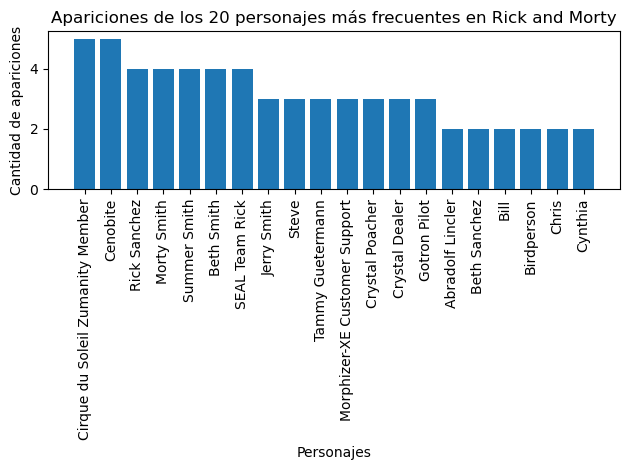

In [27]:
import requests
import matplotlib.pyplot as plt

def obtener_todos_los_personajes():
    # ... código anterior ...
    return personajes

# Obtener todos los personajes
personajes = obtener_todos_los_personajes()

# Contar la cantidad de veces que aparece cada personaje
contador_personajes = {}
for personaje in personajes:
    nombre = personaje["name"]
    contador_personajes[nombre] = contador_personajes.get(nombre, 0) + 1

# Obtener los nombres y las cantidades para el gráfico
nombres = list(contador_personajes.keys())
cantidades = list(contador_personajes.values())

# Ordenar los personajes por cantidad de apariciones en orden descendente
personajes_ordenados = sorted(contador_personajes.items(), key=lambda x: x[1], reverse=True)

# Tomar solo los 20 personajes más frecuentes
personajes_top20 = personajes_ordenados[:20]
nombres = [personaje[0] for personaje in personajes_top20]
cantidades = [personaje[1] for personaje in personajes_top20]

# Crear el gráfico de barras
plt.bar(nombres, cantidades)
plt.xticks(rotation=90)  # Rotar los nombres en el eje x para mayor legibilidad
plt.xlabel("Personajes")
plt.ylabel("Cantidad de apariciones")
plt.title("Apariciones de los 20 personajes más frecuentes en Rick and Morty")
plt.tight_layout()  # Ajustar el espaciado
plt.show()



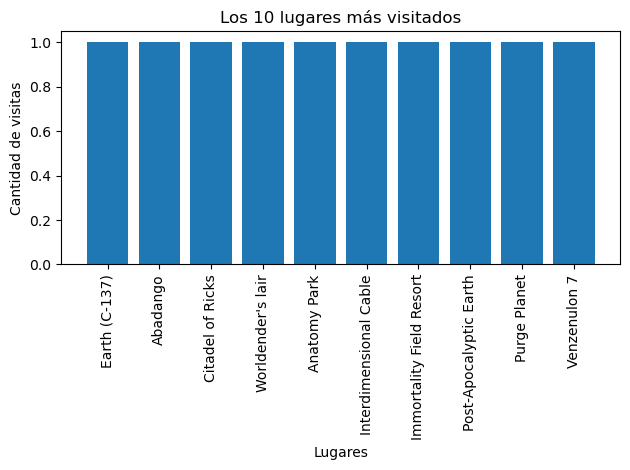

In [34]:
import requests
import matplotlib.pyplot as plt

def obtener_locations():
    # ... código anterior ...
    return locations

# Obtener todos los lugares
locations = obtener_locations()

# Contar la cantidad de veces que se ha visitado cada lugar
contador_lugares = {}
for location in locations:
    nombre = location["name"]
    contador_lugares[nombre] = contador_lugares.get(nombre, 0) + 1

# Obtener los lugares y las cantidades para el gráfico
nombres = list(contador_lugares.keys())
cantidades = list(contador_lugares.values())

# Ordenar los lugares por cantidad de visitas en orden descendente
lugares_ordenados = sorted(contador_lugares.items(), key=lambda x: x[1], reverse=True)

# Tomar solo los 10 lugares más visitados
lugares_top10 = lugares_ordenados[:10]
nombres_top10 = [lugar[0] for lugar in lugares_top10]
cantidades_top10 = [lugar[1] for lugar in lugares_top10]

# Crear el gráfico de barras
plt.bar(nombres_top10, cantidades_top10)
plt.xticks(rotation=90)  # Rotar los nombres en el eje x para mayor legibilidad
plt.xlabel("Lugares")
plt.ylabel("Cantidad de visitas")
plt.title("Los 10 lugares más visitados")
plt.tight_layout()  # Ajustar el espaciado
plt.show()


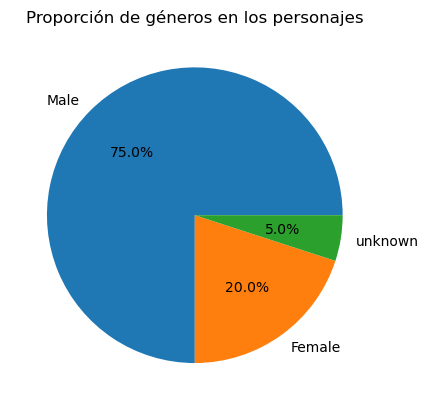

In [29]:
# Contar la cantidad de personajes por género
conteo_genero = df_character['gender'].value_counts()

# Crear el gráfico de pastel
plt.pie(conteo_genero.values, labels=conteo_genero.index, autopct='%1.1f%%')
plt.title('Proporción de géneros en los personajes')
plt.show()


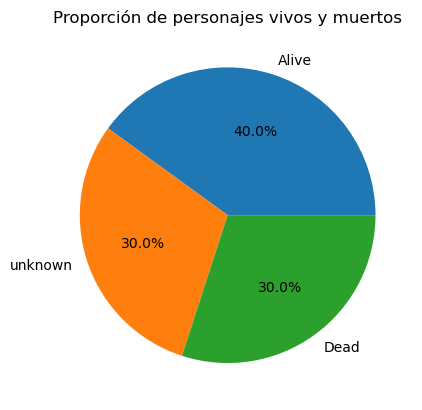

In [35]:
# Contar la cantidad de personajes vivos y muertos
conteo_estado = df_character['status'].value_counts()

# Crear el gráfico de pastel
plt.pie(conteo_estado.values, labels=conteo_estado.index, autopct='%1.1f%%')
plt.title('Proporción de personajes vivos y muertos')
plt.show()
